In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import os
from tqdm import tqdm
import cv2

In [2]:
REBUILD_DATA = True

class MakeTrain():
    IMG_SIZE = 48
    #resize the images to 50 by 50
    angry = "train/angry"
    fear = "train/fear"
    happy = "train/happy"
    sad = "train/sad"
    surprise = "train/surprise"
    neutral = "train/neutral"
    LABELS = {angry : 0, fear : 1, happy : 2, sad : 3, surprise : 4, neutral : 5}
    training_data = []
    angrycount = 0
    fearcount = 0
    happycount = 0
    sadcount = 0
    surprisecount = 0
    neutralcount = 0
    
    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                    path = os.path.join(label, f)
                    #joining the path + the name of the file
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    #convert to grayscale
                    img = cv2.resize(img,(self.IMG_SIZE, self.IMG_SIZE))
                    self.training_data.append([np.array(img), np.eye(6)[self.LABELS[label]]])
                    #combine the images with the one hot vector

                    if label == self.angry:
                        self.angrycount += 1
                    elif label == self.fear:
                        self.fearcount += 1
                    elif label == self.happy:
                        self.happycount += 1
                    elif label == self.sad:
                        self.sadcount += 1
                    elif label == self.surprise:
                        self.surprisecount += 1
                    elif label == self.neutral:
                        self.neutralcount += 1

                
        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print("Angry: ", self.angrycount)
        print("Fear: ", self.fearcount)
        print("Happy: ", self.happycount)
        print("Sad: ", self.sadcount)
        print("Surprise: ", self.surprisecount)
        print("Neutral: ", self.neutralcount)

if REBUILD_DATA:
    prediction = MakeTrain()
    prediction.make_training_data()
    
training_data = np.load("training_data.npy", allow_pickle = True)

train/angry


100%|███████████████████████████████████████████████████████████████████████████| 3995/3995 [00:00<00:00, 15551.96it/s]


train/fear


100%|███████████████████████████████████████████████████████████████████████████| 4097/4097 [00:00<00:00, 15537.61it/s]


train/happy


100%|███████████████████████████████████████████████████████████████████████████| 7215/7215 [00:00<00:00, 15208.98it/s]


train/sad


100%|███████████████████████████████████████████████████████████████████████████| 4830/4830 [00:00<00:00, 15641.47it/s]


train/surprise


100%|███████████████████████████████████████████████████████████████████████████| 3171/3171 [00:00<00:00, 15352.37it/s]


train/neutral


100%|███████████████████████████████████████████████████████████████████████████| 4965/4965 [00:00<00:00, 15245.96it/s]
C:\Users\PC\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\lib\npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


Angry:  3995
Fear:  4097
Happy:  7215
Sad:  4830
Surprise:  3171
Neutral:  4965


In [3]:
REBUILD_DATA = True

class MakeTest():
    IMG_SIZE = 48
    #resize the images to 50 by 50
    angry = "test/angry"
    fear = "test/fear"
    happy = "test/happy"
    sad = "test/sad"
    surprise = "test/surprise"
    neutral = "test/neutral"
    LABELS = {angry : 0, fear : 1, happy : 2, sad : 3, surprise : 4, neutral : 5}
    testing_data = []
    angrycount = 0
    fearcount = 0
    happycount = 0
    sadcount = 0
    surprisecount = 0
    neutralcount = 0
    
    def make_testing_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                    path = os.path.join(label, f)
                    #joining the path + the name of the file
                    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                    #convert to grayscale
                    img = cv2.resize(img,(self.IMG_SIZE, self.IMG_SIZE))
                    self.testing_data.append([np.array(img), np.eye(6)[self.LABELS[label]]])
                    #combine the images with the one hot vector

                    if label == self.angry:
                        self.angrycount += 1
                    elif label == self.fear:
                        self.fearcount += 1
                    elif label == self.happy:
                        self.happycount += 1
                    elif label == self.sad:
                        self.sadcount += 1
                    elif label == self.surprise:
                        self.surprisecount += 1
                    elif label == self.neutral:
                        self.neutralcount += 1

                
        np.random.shuffle(self.testing_data)
        np.save("testing_data.npy", self.testing_data)
        print("Angry: ", self.angrycount)
        print("Fear: ", self.fearcount)
        print("Happy: ", self.happycount)
        print("Sad: ", self.sadcount)
        print("Surprise: ", self.surprisecount)
        print("Neutral: ", self.neutralcount)

if REBUILD_DATA:
    prediction = MakeTest()
    prediction.make_testing_data()
    
testing_data = np.load("testing_data.npy", allow_pickle = True)

test/angry


100%|█████████████████████████████████████████████████████████████████████████████| 958/958 [00:00<00:00, 15729.11it/s]


test/fear


100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [00:00<00:00, 15880.05it/s]


test/happy


100%|███████████████████████████████████████████████████████████████████████████| 1774/1774 [00:00<00:00, 16088.20it/s]


test/sad


100%|███████████████████████████████████████████████████████████████████████████| 1247/1247 [00:00<00:00, 15992.49it/s]


test/surprise


100%|█████████████████████████████████████████████████████████████████████████████| 831/831 [00:00<00:00, 15492.89it/s]


test/neutral


100%|███████████████████████████████████████████████████████████████████████████| 1233/1233 [00:00<00:00, 13927.62it/s]


Angry:  958
Fear:  1024
Happy:  1774
Sad:  1247
Surprise:  831
Neutral:  1233


In [4]:
import torch
import torch.nn as nn 
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 64, 3),
            nn.BatchNorm2d(64),
#             nn.Dropout(0.25)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(64, 128, 5),
            nn.BatchNorm2d(128),
#             nn.Dropout(0.25)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(128, 512, 3),
            nn.BatchNorm2d(512),
#             nn.Dropout(0.25)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(512, 512, 3),
            nn.BatchNorm2d(512),
#             nn.Dropout(0.25)
        )
        
        x = torch.randn(48,48).view(-1,1,48,48)
        self._to_linear = None
        self.convs(x)
        
        self.fc1 = nn.Sequential(
            nn.Linear(self._to_linear ,256),
#             nn.Dropout(0.25)
        )
        self.fc2 = nn.Sequential(
            nn.Linear(256, 512),
#             nn.Dropout(0.25)
        )
        self.fc3 = nn.Sequential(
            nn.Linear(512, 6),
        )
        
    def convs(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2,2))
        
        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
            print(self._to_linear)
        return x
    
    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x),dim=1)
        
        return x
        
net = Net()

4608


C:\Users\PC\AppData\Local\Programs\Python\Python37\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
device = torch.device("cuda:0")
device

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("running on the GPU")
else:
    device = torch.device("cpu")
    print("running on the CPU")

net = Net().to(device)

running on the GPU
4608


In [6]:
np.info(testing_data)

class:  ndarray
shape:  (7067, 2)
strides:  (16, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x25c787bc020
byteorder:  little
byteswap:  False
type: object


In [7]:
import torch.optim as optim
from sklearn.model_selection import train_test_split

optimizer = optim.Adam(net.parameters(), lr = 0.001)
loss_function = nn.MSELoss()

train_X = torch.Tensor([i[0] for i in training_data]).view(-1,48,48)
train_X = train_X/255.0
test_X = torch.Tensor([i[0] for i in testing_data]).view(-1,48,48)
train_X = train_X/255.0

train_y = torch.Tensor([i[1] for i in training_data])
test_y = torch.Tensor([i[1] for i in testing_data])

C:\Users\PC\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:233.)
  import sys


In [8]:
BATCH_SIZE = 100
EPOCHS = 35

losses = []
accuracies = []

predicteds = []

for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
        
        batch_X = train_X[i:i+BATCH_SIZE].view(-1,1,48,48).to(device)
        batch_y = train_y[i:i+BATCH_SIZE].to(device)
        
        net.zero_grad()
        outputs = net(batch_X)
        loss = loss_function(outputs, batch_y)
        loss.backward()
        
        optimizer.step()
        
    losses.append(loss.item())
#     if(True):
#         predicted = np.array([])
#         true = np.array([])
#         correct = 0
#         total = 0
#         for j in tqdm(range(len(test_X))):
#             real_class = torch.argmax(test_y[j].to(device)).cpu()
#             true = np.append(true,real_class.item())

#             net_out = net(test_X[j:j+BATCH_SIZE].view(-1,1,48,48).to(device))[0]
#             predicted_class = torch.argmax(net_out).cpu()
#             predicted = np.append(predicted,predicted_class)

#             predicteds.append(predicted)

#             if predicted_class == real_class:
#                 correct += 1
#             total += 1
#         accuracy = round(correct/total,3)
#         accuracies.append(accuracy)

100%|████████████████████████████████████████████████████████████████████████████████| 283/283 [00:04<00:00, 64.36it/s]


<AxesSubplot:>

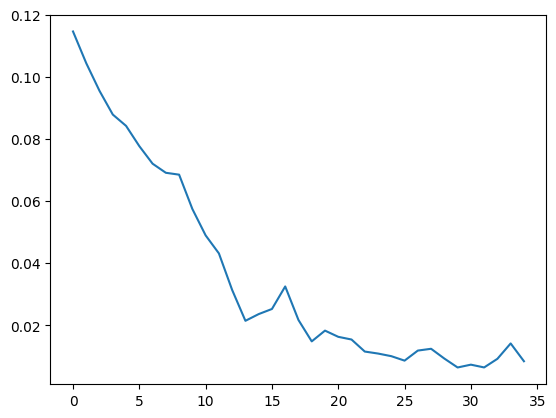

In [9]:
import seaborn as sns

sns.lineplot(losses)

<AxesSubplot:>

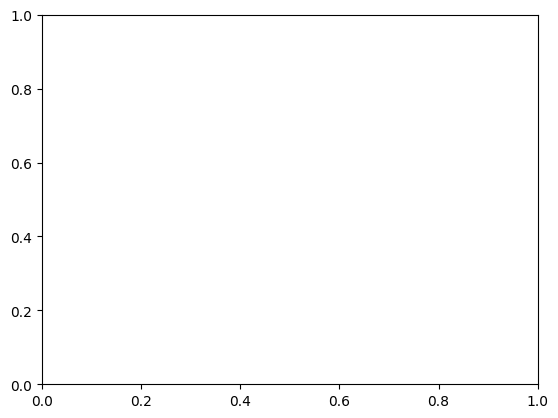

In [10]:

sns.lineplot(accuracies)

In [13]:
correct = 0
total = 0
predicted = np.array([])
true = np.array([])

with torch.no_grad():
    for i in tqdm(range(len(test_X))):
        real_class = torch.argmax(test_y[i].to(device)).cpu()
        true = np.append(true,real_class.item())
        
        net_out = net(test_X[i:i+BATCH_SIZE].view(-1,1,48,48).to(device))[0]
        predicted_class = torch.argmax(net_out).cpu()
        predicted = np.append(predicted,predicted_class)
        
        if predicted_class == real_class:
            correct += 1
        total += 1
        
    
accuracy = round(correct/total,3)
    
print("Accuracy:", accuracy)

100%|█████████████████████████████████████████████████████████████████████████████| 7067/7067 [00:35<00:00, 200.96it/s]

Accuracy: 0.546


[5. 1. 5. ... 4. 4. 5.]
[2. 1. 3. ... 1. 1. 5.]
              precision    recall  f1-score   support

         0.0       0.50      0.43      0.46       958
         1.0       0.40      0.37      0.38      1024
         2.0       0.71      0.79      0.75      1774
         3.0       0.40      0.60      0.48      1247
         4.0       0.85      0.50      0.63       831
         5.0       0.53      0.41      0.46      1233

    accuracy                           0.55      7067
   macro avg       0.56      0.52      0.53      7067
weighted avg       0.57      0.55      0.55      7067

[[ 415  106  116  222    8   91]
 [  98  375  101  322   36   92]
 [  83   50 1395  153   18   75]
 [ 122  111  110  750    6  148]
 [  21  193   79   76  415   47]
 [  97   98  156  365    7  510]]


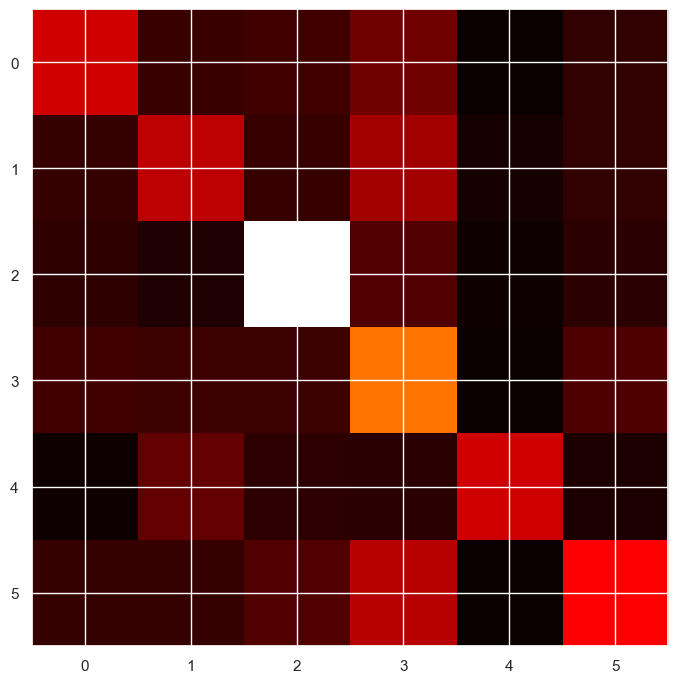

In [14]:
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, roc_auc_score
print(true)
print(predicted)

print(classification_report(true, predicted))

print(confusion_matrix(true, predicted))

sns.set(rc={'figure.figsize':(11.7,8.27)})
# sns.heatmap(confusion_matrix(true, predicted),annot=True)
plt.imshow(confusion_matrix(true, predicted), cmap='hot')
plt.show()

In [15]:
import torch.onnx

tensor = torch.randn(1, 1, 48, 48).to('cuda')

# Export the model to ONNX format
onnx_model = torch.onnx.export(net, tensor, "model.onnx", export_params=True)